In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [76]:
df.shape

(768, 9)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
# check missing values in variables
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [79]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


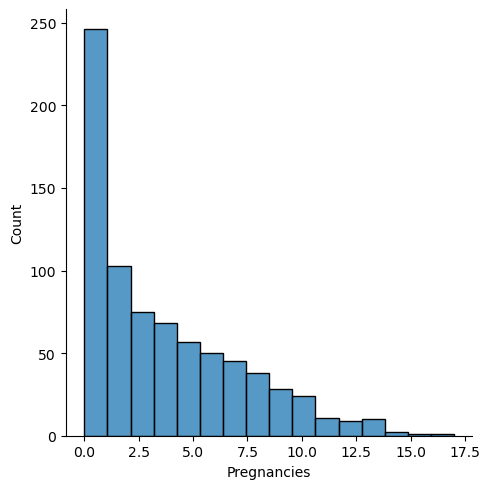

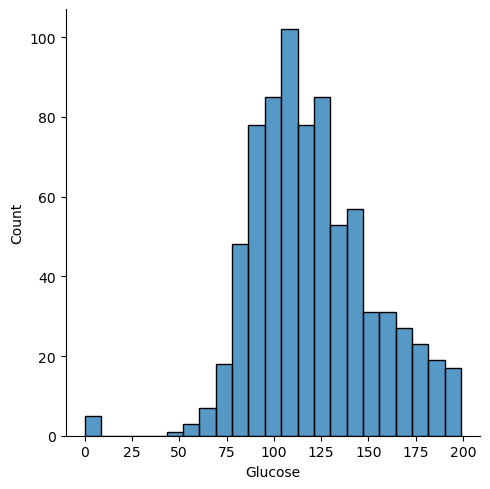

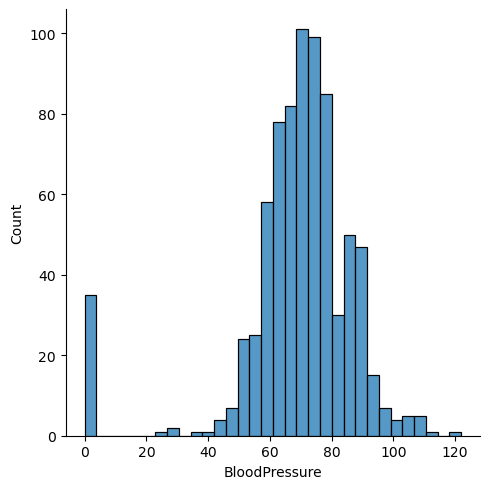

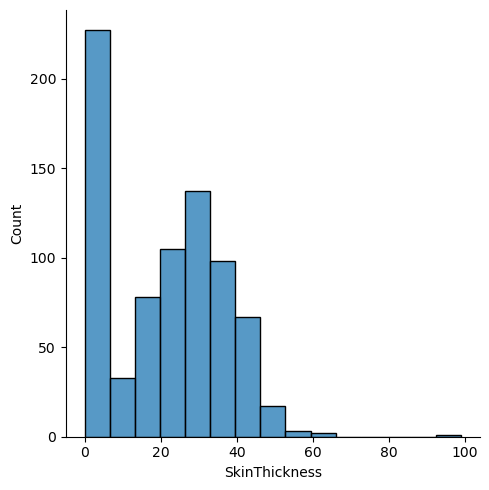

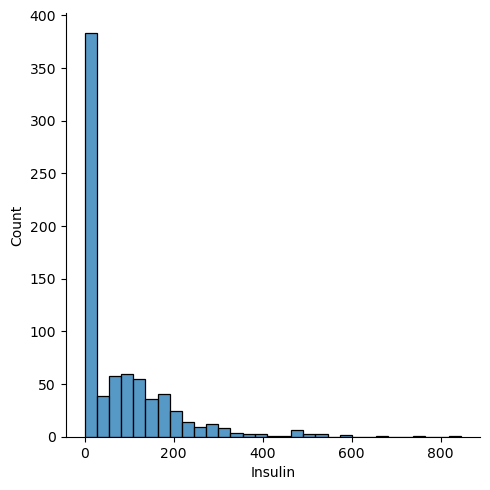

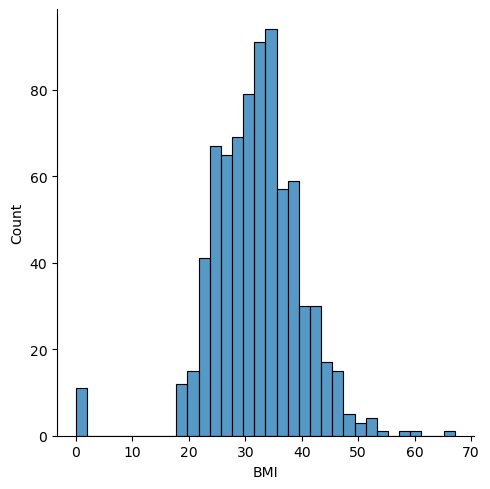

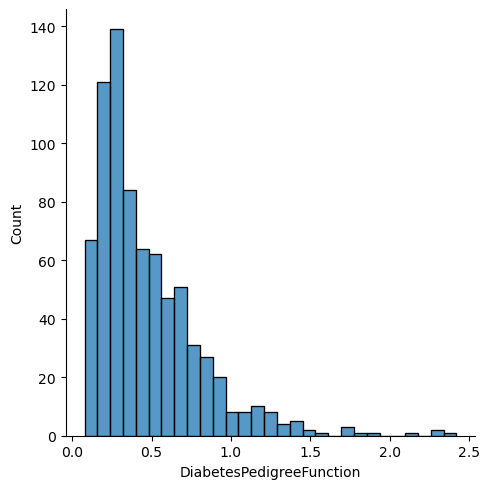

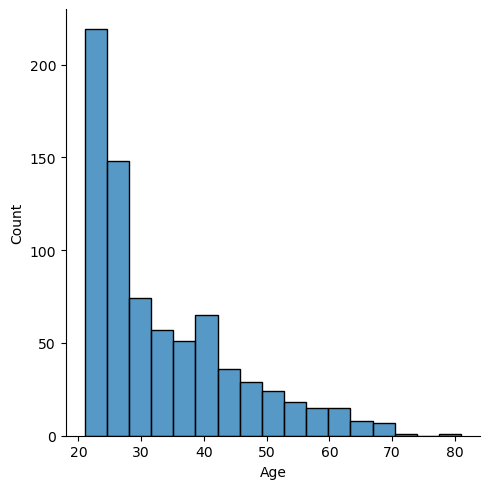

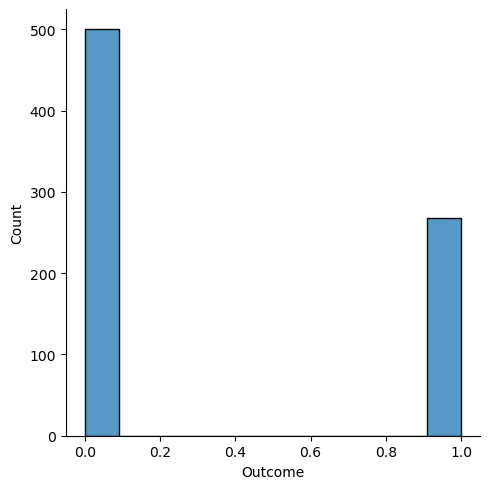

In [80]:
for column in df:
    sns.displot(df[column])

1. Replace your df with np.nan and check it using df.info().
2. Filter the df based on the outcome.
3. Now replace the NaN values with the median or mean for both the df.

In [81]:
df[df.columns[:-1]] = df[df.columns[:-1]].replace(0, np.nan)

df_outcome_0 = df[df['Outcome'] == 0].copy()
df_outcome_1 = df[df['Outcome'] == 1].copy()

df_outcome_0[df.columns[:-1]] = df_outcome_0[df.columns[:-1]].fillna(df_outcome_0[df.columns[:-1]].median())
df_outcome_1[df.columns[:-1]] = df_outcome_1[df.columns[:-1]].fillna(df_outcome_1[df.columns[:-1]].median())

Finally Concat both the df

In [82]:
df_processed = pd.concat([df_outcome_0, df_outcome_1]).sort_index()

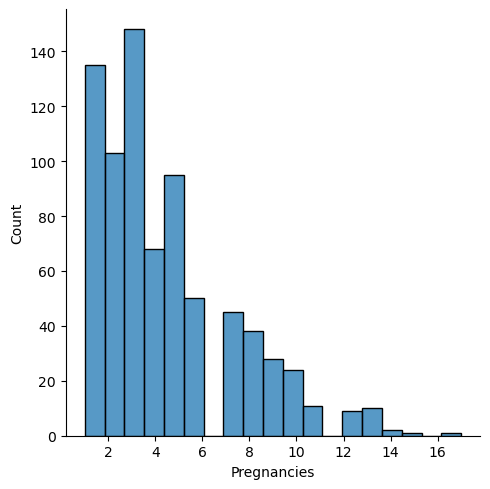

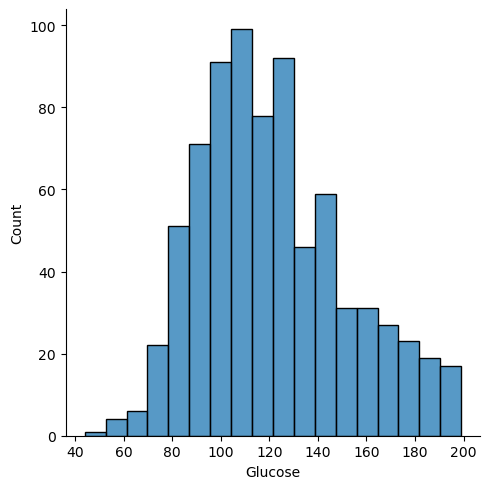

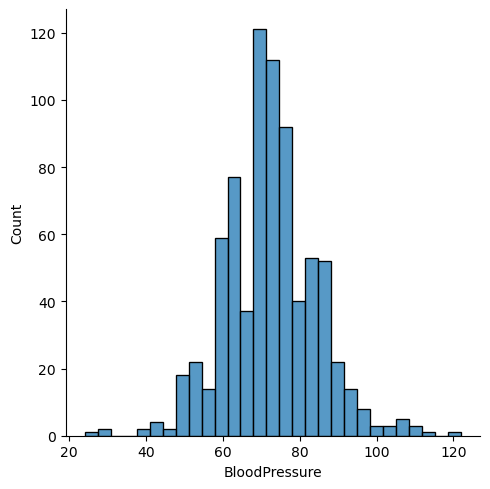

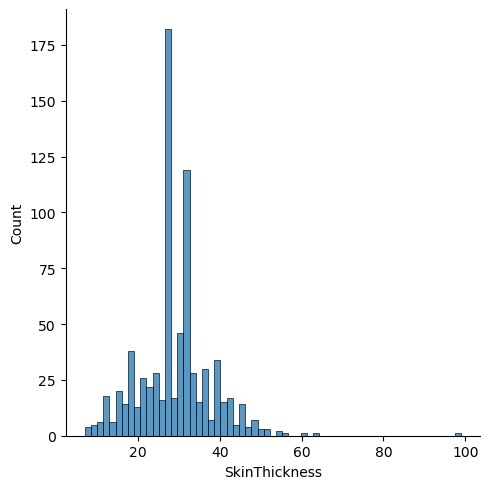

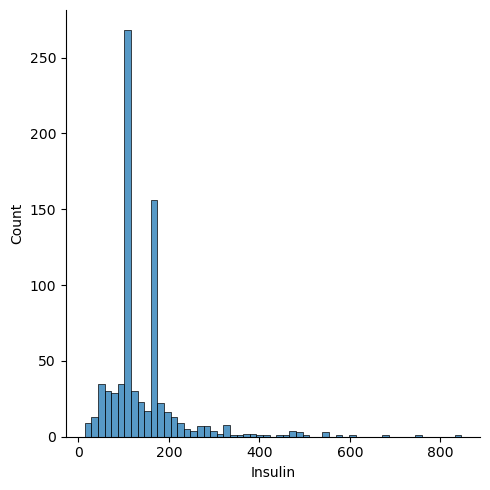

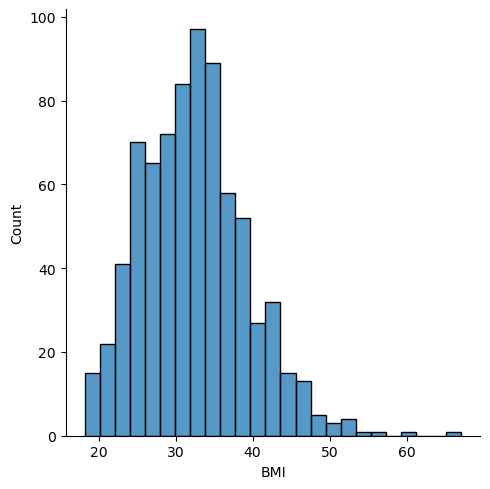

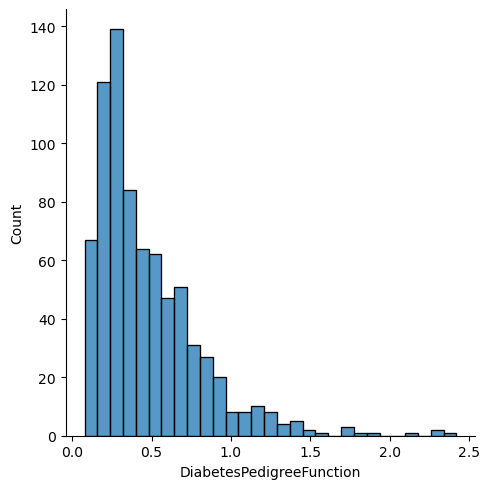

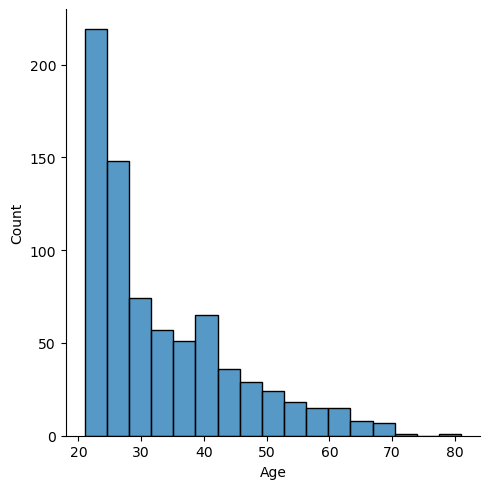

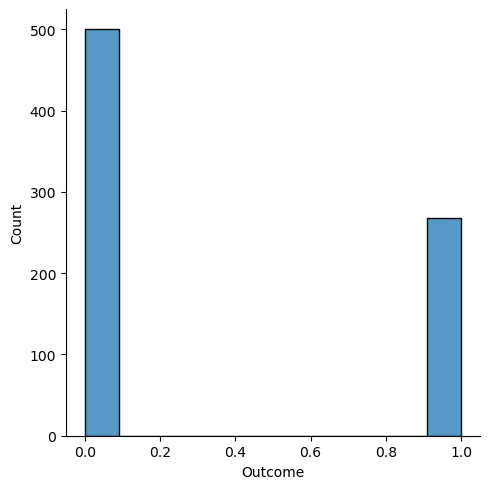

In [83]:
for column in df_processed:
    sns.displot(df_processed[column])

In [84]:
df_processed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### How are the predictor variables related to each other?

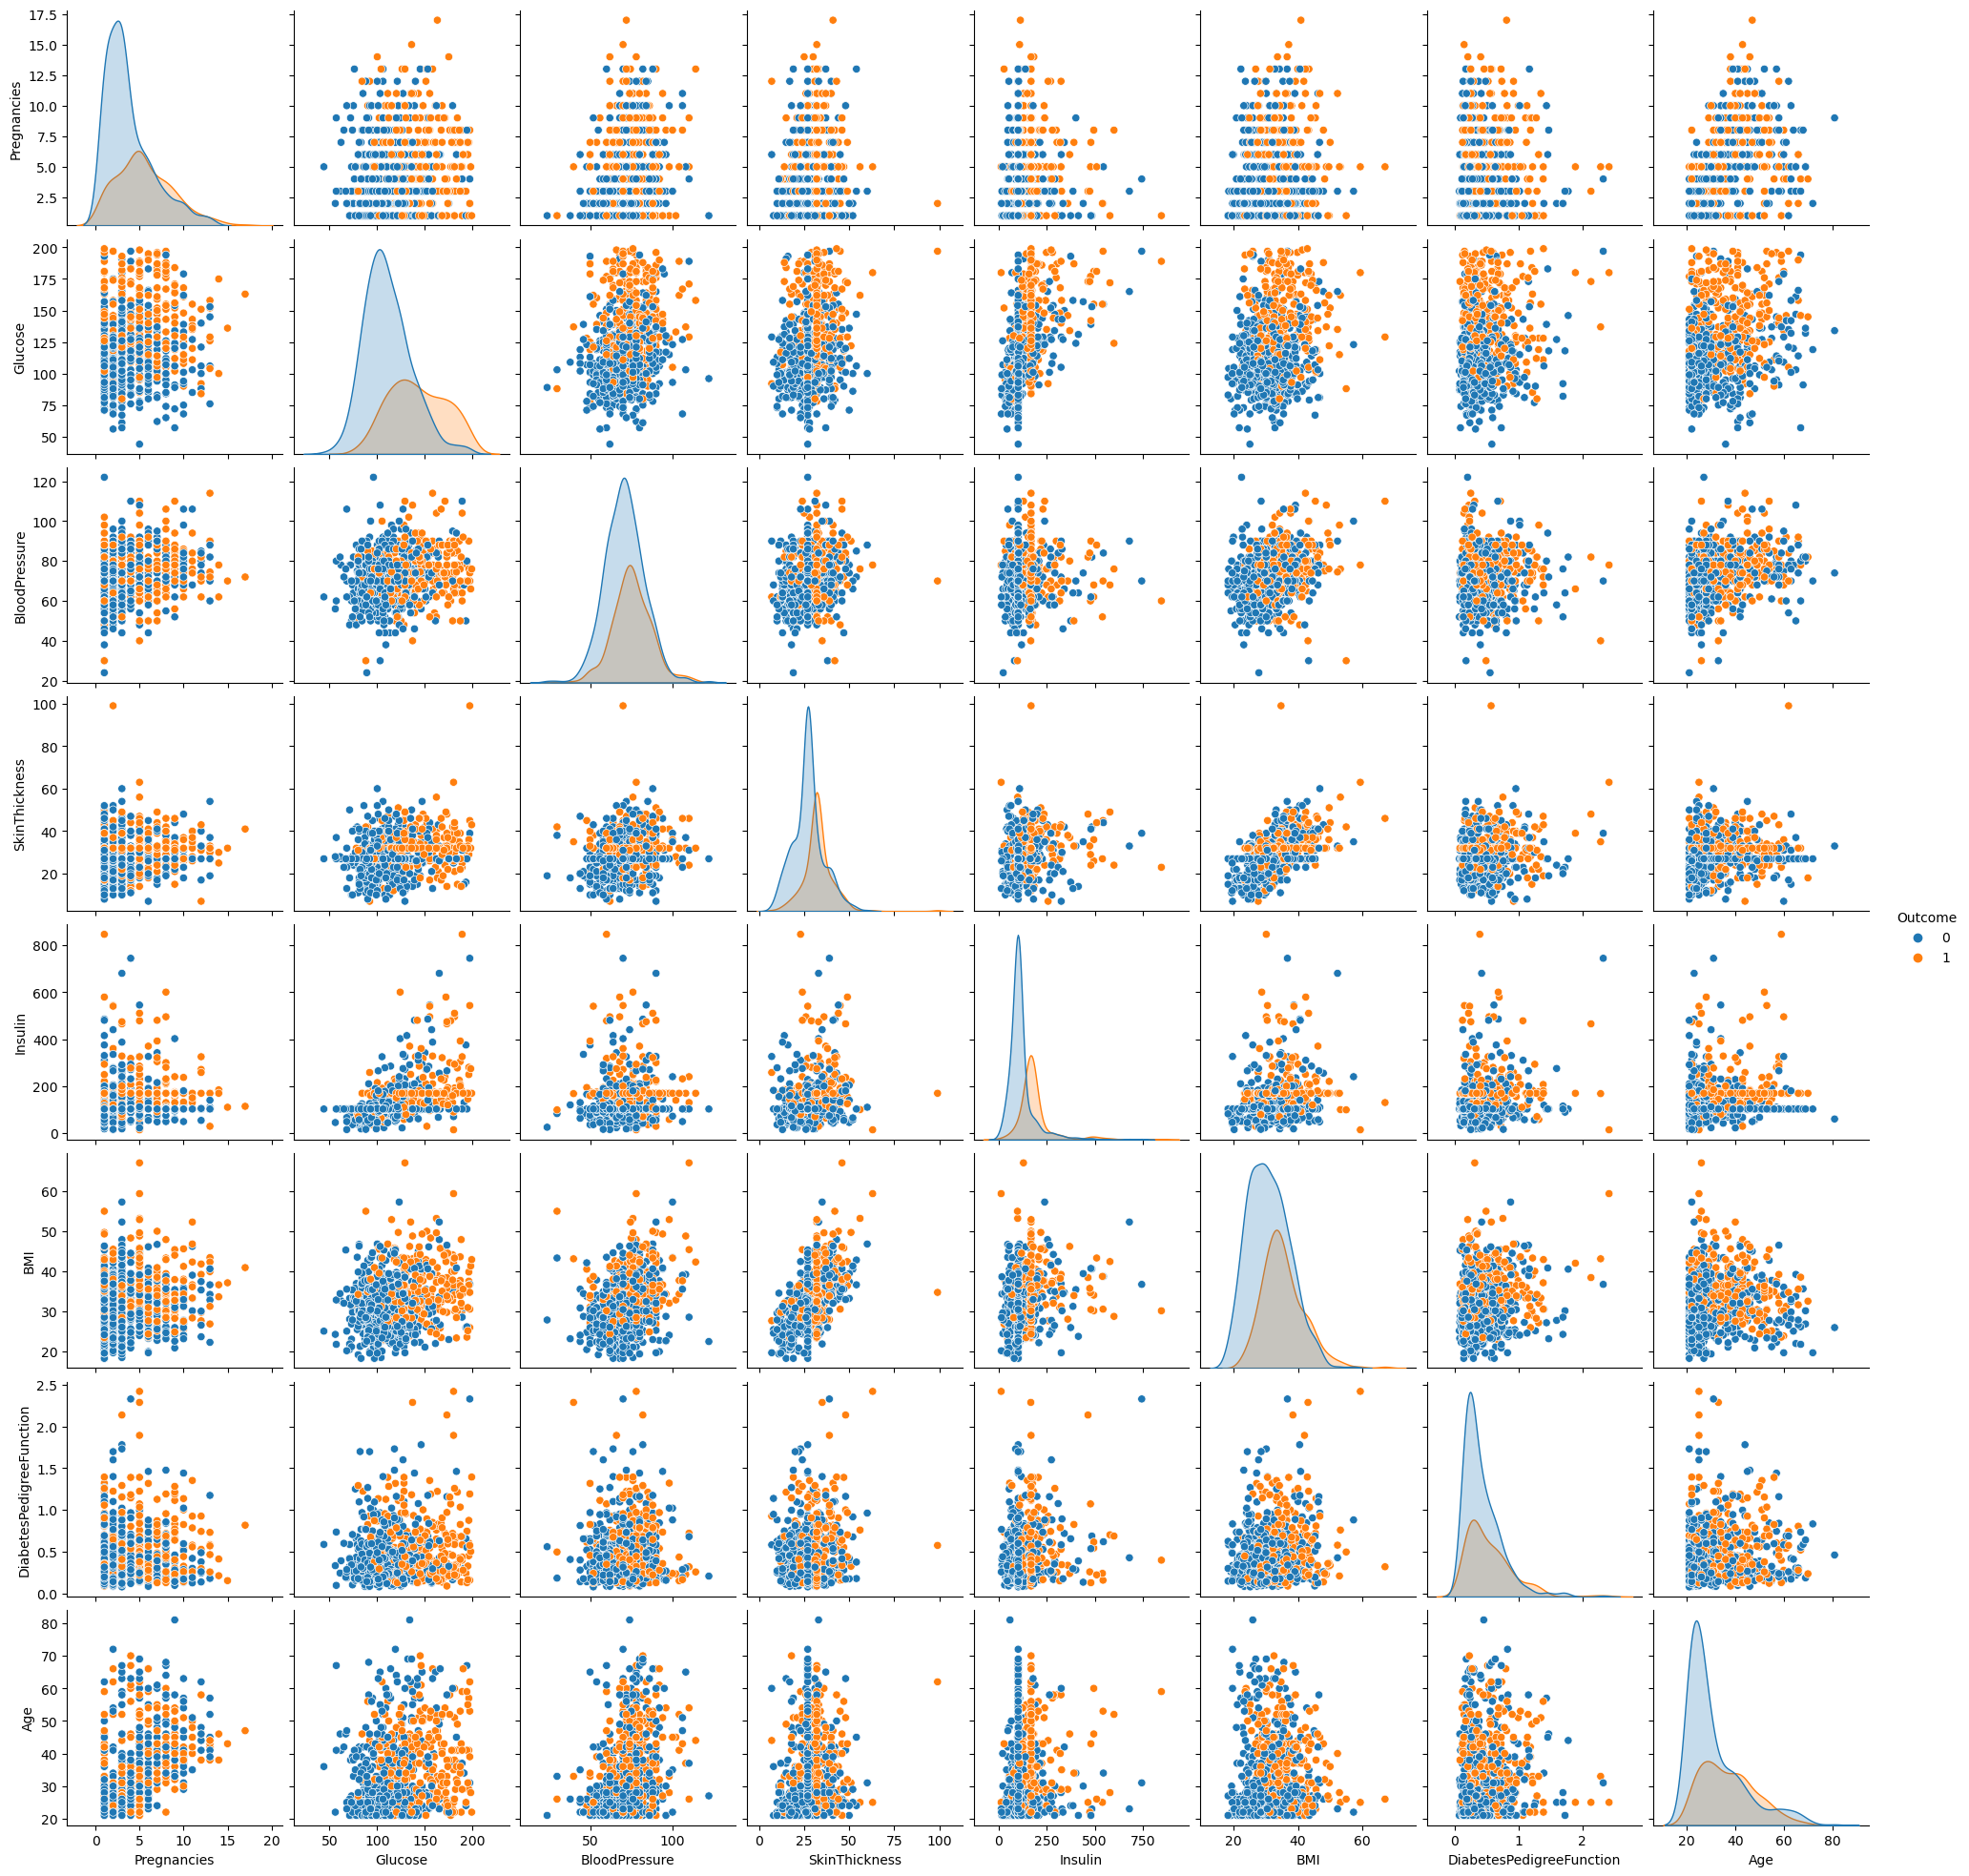

In [85]:
sns.pairplot(df_processed, hue='Outcome')

### What is the average age of the individuals in the dataset?

In [86]:
avg_age = df_processed['Age'].mean()

print("Average Age:", avg_age)

Average Age: 33.240885416666664


### What is the average BMI for individuals with diabetes and without diabetes?

In [87]:
# Calculate the average glucose level for individuals with diabetes
avg_BMI_diabetes = df_processed[df_processed['Outcome'] == 1]['BMI'].mean()

# Calculate the average glucose level for individuals without diabetes
avg_BMI_no_diabetes = df_processed[df_processed['Outcome'] == 0]['BMI'].mean()

print("Average BMI for individuals with diabetes:", avg_BMI_diabetes)
print("Average BMI for individuals without diabetes:", avg_BMI_no_diabetes)

Average BMI for individuals with diabetes: 35.39850746268657
Average BMI for individuals without diabetes: 30.846


### What is the average glucose level for individuals with diabetes and without diabetes?

In [88]:
# Calculate the average glucose level for individuals with diabetes
avg_glucose_diabetes = df_processed[df_processed['Outcome'] == 1]['Glucose'].mean()

# Calculate the average glucose level for individuals without diabetes
avg_glucose_no_diabetes = df_processed[df_processed['Outcome'] == 0]['Glucose'].mean()

print("Average glucose level for individuals with diabetes:", avg_glucose_diabetes)
print("Average glucose level for individuals without diabetes:", avg_glucose_no_diabetes)

Average glucose level for individuals with diabetes: 142.30223880597015
Average glucose level for individuals without diabetes: 110.622






### Declare feature vector and target variable

In [89]:
X = df_processed.drop(['Outcome'], axis=1)

y = df_processed['Outcome']

### Split data into separate training and test set 

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [91]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((514, 8), (254, 8))

### Random Forest Classifier model with default parameters

In [92]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8701


###  Random Forest Classifier model with parameter n_estimators=100

In [93]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8701


### Find important features with Random Forest model

In [94]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Visualize feature scores of the features

In [95]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Insulin                     0.350163
Glucose                     0.166065
SkinThickness               0.133898
Age                         0.097578
BMI                         0.077492
Pregnancies                 0.070701
DiabetesPedigreeFunction    0.058932
BloodPressure               0.045171
dtype: float64

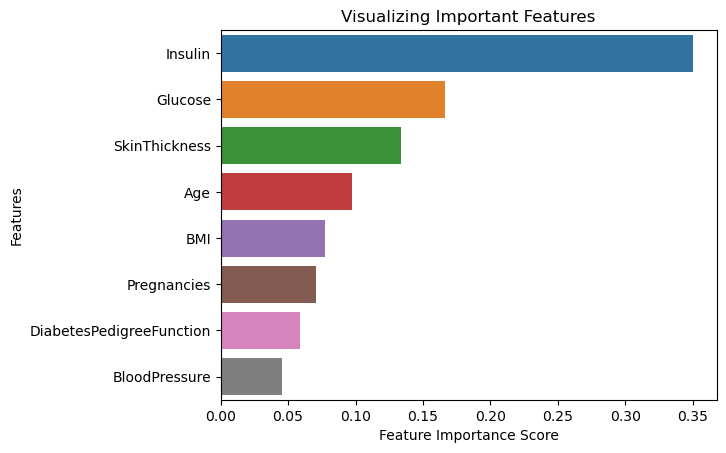

In [96]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

### Build Random Forest model on selected features 

In [97]:
# declare feature vector and target variable

X = df_processed.drop(['Outcome', 'BloodPressure'], axis=1)

y = df_processed['Outcome']

In [98]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [99]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with BloodPressure variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with BloodPressure variable removed : 0.8740


In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       168
           1       0.80      0.84      0.82        86

    accuracy                           0.87       254
   macro avg       0.86      0.87      0.86       254
weighted avg       0.88      0.87      0.87       254

